In [1]:
!python --version

Python 3.10.12


In [2]:
!pip install ultralytics==8.0.196
!pip install roboflow

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [3]:
import ultralytics
ultralytics.__version__

'8.0.196'

In [4]:
import torch
torch.__version__

'2.3.1+cu121'

In [5]:
from roboflow import Roboflow
rf = Roboflow(api_key="HtSrnfhDjQBex2xFS2wZ")
project = rf.workspace("arul").project("screw-and-bolt-nwp0z")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Screw-and-Bolt--3 in yolov8:: 100%|██████████| 142/142 [00:00<00:00, 4720.73it/s]


In [6]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/78.2 GB disk)


In [7]:
from ultralytics import YOLO
model = YOLO('yolov8s.pt')
results=model.train(data = '/content/Screw-and-Bolt--3/data.yaml', epochs = 20, imgsz = 640)

100%|██████████| 21.5M/21.5M [00:00<00:00, 36.8MB/s]
New https://pypi.org/project/ultralytics/8.2.70 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Screw-and-Bolt--3/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buf

In [8]:
# Verify the classes in the trained model
print(model.model.names)

{0: 'Screw', 1: 'bolt'}


In [15]:
results = model.predict("/content/img1.jpg", save=True, conf=0.2, iou=0.5)


image 1/1 /content/img1.jpg: 480x640 43 Screws, 123.2ms
Speed: 4.5ms preprocess, 123.2ms inference, 3.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict2


Number of items= 43


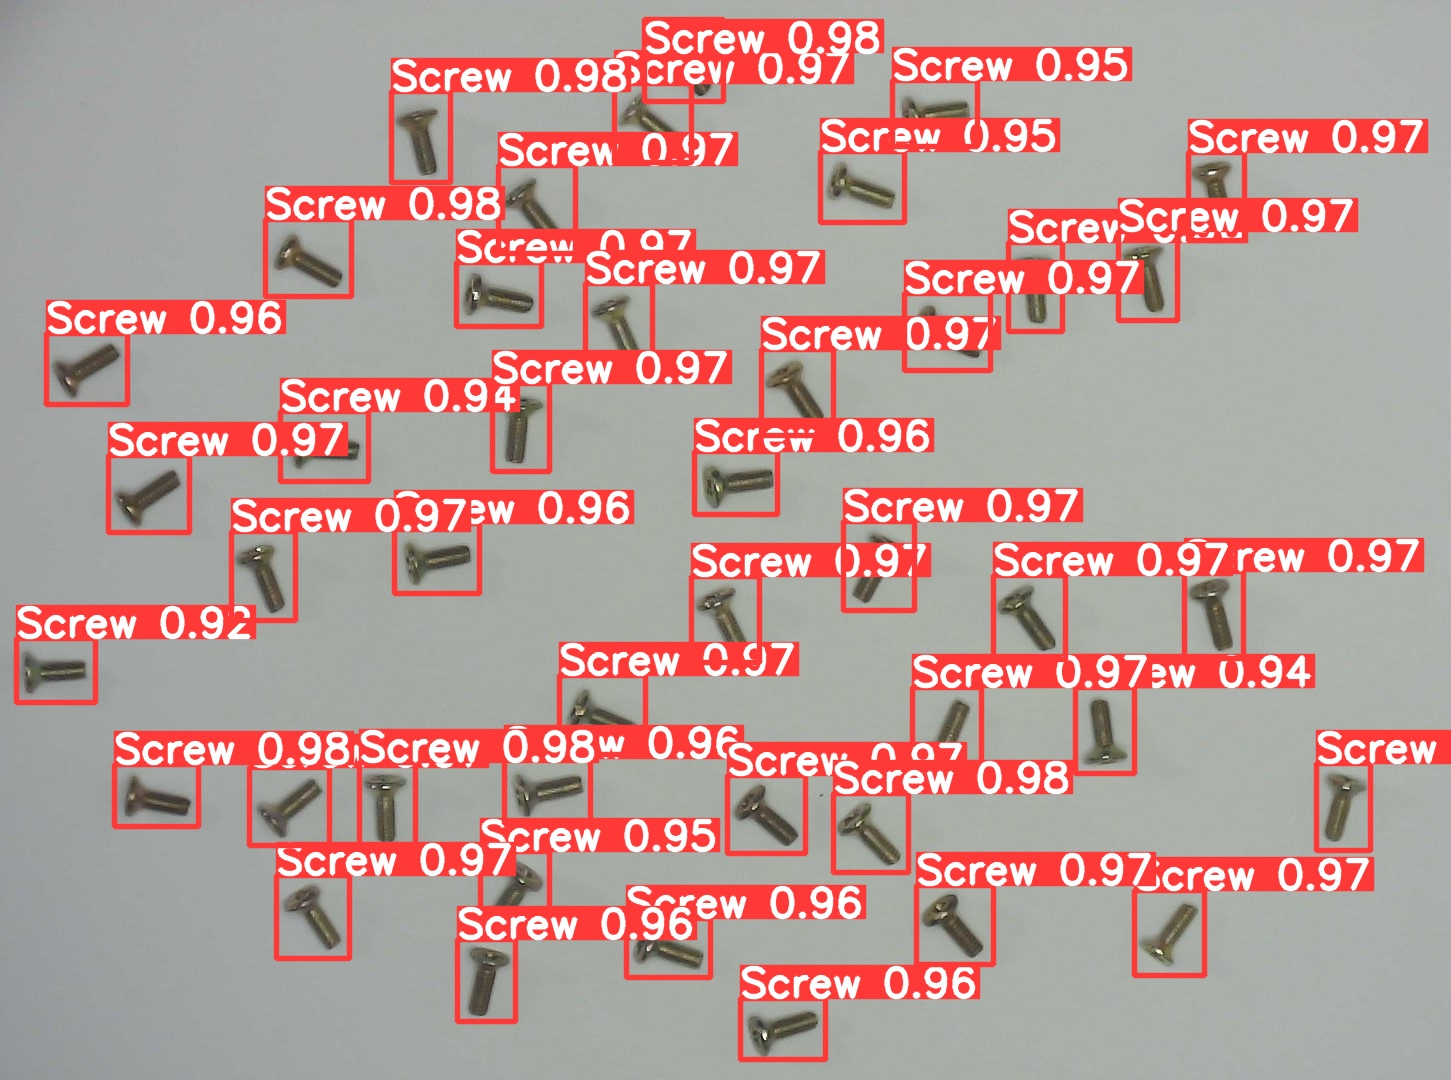

In [20]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Path to your image file
image_path = '/content/runs/detect/predict2/img1.jpg'

# Load the image
img = cv2.imread(image_path)
print('Number of items=',len(results[0].boxes))
cv2_imshow(img)